In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
from IPython import display
from ipywidgets import IntProgress

from code.mcmc import *
from code.lattice import *

%load_ext autoreload
%autoreload 2

# Inference: Gibbs Sampling

In [2]:
fprefix = 'mcmc_gaussian'

h, w = 256, 256

J = 0.5
B = np.zeros((h, w)) # 0.01 * gaussian_B(h, w)
beta = 10

n_steps = 256

In [3]:
lattice = create_spin_lattice(h, w).astype('int8')

timesteps = [lattice.copy()]
magnetizations = [magnetization(lattice)]
energies = [energy(lattice, J, B)]

In [4]:
f = IntProgress(min=0, max=n_steps)
display.display(f)
for i in range(n_steps):
    step_all(lattice, J, B, beta)

    timesteps.append(lattice.copy())
    magnetizations.append(magnetization(lattice))
    energies.append(energy(lattice, J, B))
    
    f.value += 1

IntProgress(value=0, max=256)

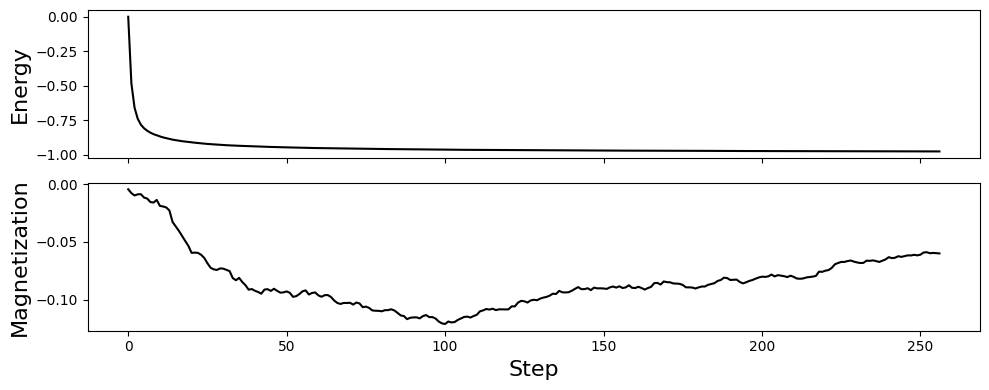

In [5]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

ax0.plot(energies, color='black')
ax0.set_ylabel('Energy', fontsize=16)

ax1.plot(magnetizations, color='black')
ax1.set_ylabel('Magnetization', fontsize=16)

plt.xlabel('Step', fontsize=16)
plt.tight_layout()

#plt.savefig('graphics/report_mcmc_zero_measurables.png')

IndexError: list index out of range

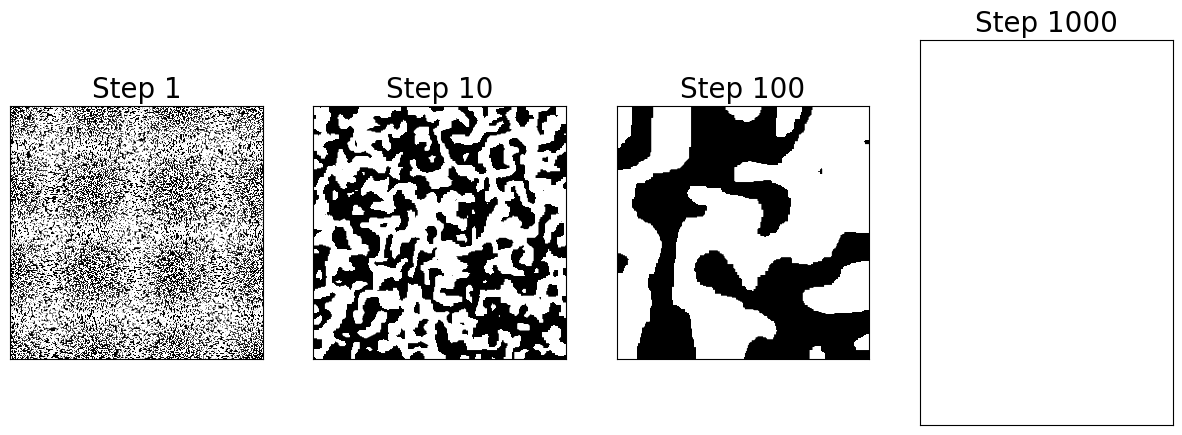

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

steps = (0, 9, 99, 999)

for i, ax in enumerate(axs):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Step {steps[i] + 1}', fontsize=20)
    ax.imshow(timesteps[steps[i]], 'binary', vmin=0, vmax=1)

plt.tight_layout()

labels = [
    Patch(facecolor='white', edgecolor='black', label='Spin down'),
    Patch(facecolor='black', edgecolor='black', label='Spin up')
]
axs[len(axs)//2].legend(handles=labels, fancybox=True, loc='lower left', bbox_to_anchor=(-0.75, -0.25), ncol=2, fontsize=20)

#plt.savefig('./graphics/report_mcmc_zero.png')

In [ ]:
render_timesteps(timesteps, 32, 8, 'graphics/' + fprefix + '.mp4')